<a href="https://colab.research.google.com/github/mentheshreya/Machine-Learning-Lab/blob/main/ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Shreya Shrishail Menthe
# PRN: 124B2B003
# Div: A

from google.colab import files
uploaded = files.upload()

Saving medical_insurance.csv to medical_insurance (1).csv


In [ ]:
import pandas as pd

df= pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.sample(7)

,age,sex,bmi,children,smoker,region,charges
795,27,male,28.50,0,yes,northwest,18310.7420
1052,49,male,29.83,1,no,northeast,9288.0267
598,43,male,32.60,2,no,southwest,7441.5010
151,48,male,29.70,0,no,southeast,7789.6350
1217,29,male,37.29,2,no,southeast,4058.1161
40,24,female,26.60,0,no,northeast,3046.0620
42,41,male,21.78,1,no,southeast,6272.4772


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Handle Null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Handle duplicate values
df.duplicated().sum()

np.int64(1)

In [ ]:
df=df.drop_duplicates()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_le = df.copy()

# Columns to encode
categorical_cols = ["sex", "smoker", "region"]

le = LabelEncoder()
for col in categorical_cols:
    df_le[col] = le.fit_transform(df_le[col])

# Separate features and target
X = df_le.drop("charges", axis=1)
y = df_le["charges"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), columns=X_test.columns, index=X_test.index
)

print("After Label Encoding and Scaling:")
print(X_train_scaled.head())


After Label Encoding and Scaling:
           age       sex       bmi  children    smoker    region
1114 -1.157680  0.971409 -0.996928 -0.907908 -0.500292 -1.383946
968  -1.300619  0.971409 -0.792762  0.766904 -0.500292 -1.383946
599   0.914926 -1.029432  1.154664  0.766904 -0.500292 -0.477983
170   1.701087  0.971409  1.806837 -0.907908 -0.500292  0.427981
275   0.557580 -1.029432 -0.651417  0.766904 -0.500292 -1.383946


Single Linear Regression (BMI only)
R2: 0.051722611542952324
RMSE: 13200.443951702524


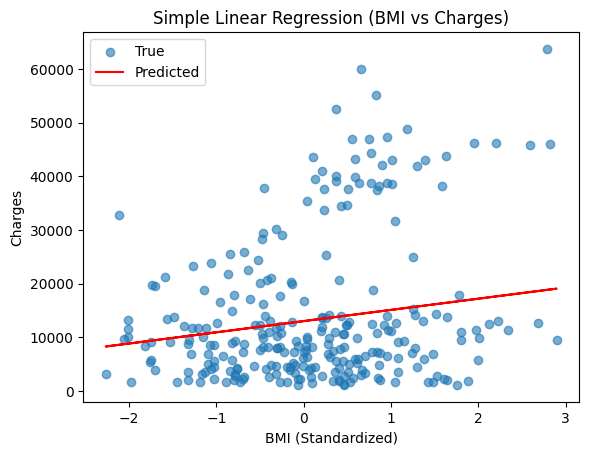

In [ ]:
# Single Linear Regression (Charges vs BMI)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_bmi = X_train_scaled[["bmi"]]
X_bmi_test = X_test_scaled[["bmi"]]

lr_single = LinearRegression()
lr_single.fit(X_bmi, y_train)
y_single_pred = lr_single.predict(X_bmi_test)

mse = mean_squared_error(y_test, y_single_pred)
rmse = np.sqrt(mse)

print("Single Linear Regression (BMI only)")
print("R2:", r2_score(y_test, y_single_pred))
print("RMSE:", rmse)

# Plot
plt.scatter(X_bmi_test, y_test, alpha=0.6, label="True")
plt.plot(X_bmi_test, y_single_pred, color="red", label="Predicted")
plt.xlabel("BMI (Standardized)")
plt.ylabel("Charges")
plt.legend()
plt.title("Simple Linear Regression (BMI vs Charges)")
plt.show()


Multiple Linear Regression
R2: 0.8068466322629111
RMSE: 5957.608799816461


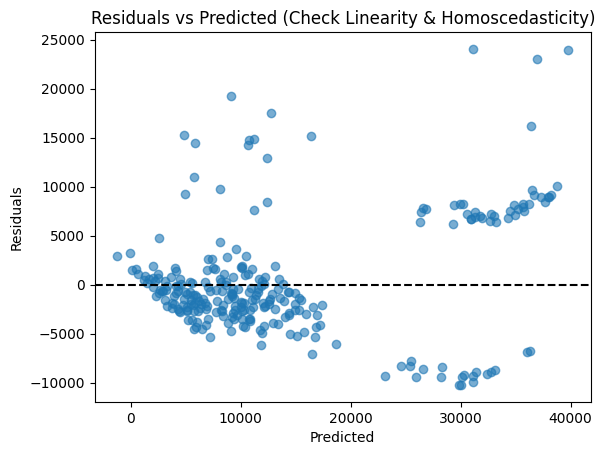

In [ ]:
# Multiple Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Multiple Linear Regression")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

# Residuals plot (Linearity & Homoscedasticity)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Check Linearity & Homoscedasticity)")
plt.show()


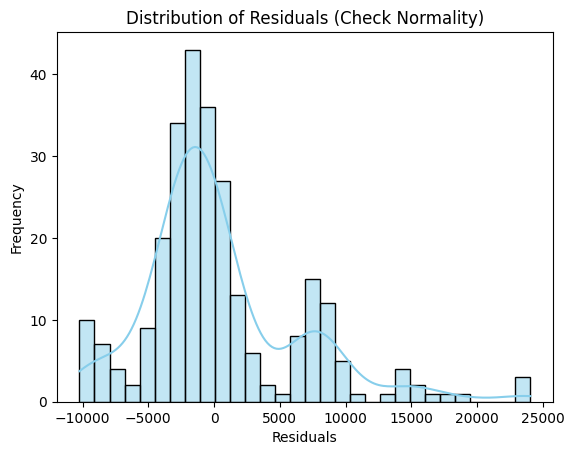

In [ ]:
# Normality of Residuals (Histogram + KDE)

sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Check Normality)")
plt.show()


In [ ]:
# Durbin-Watson Test

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
dw = durbin_watson(model_sm.resid)
print("Durbin-Watson:", dw)


Durbin-Watson: 1.9660699991720565


In [ ]:
# Multicollinearity (VIF)

vif = pd.DataFrame()
vif["Feature"] = X_train_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print(vif)


    Feature       VIF
0       age  1.021332
1       sex  1.010742
2       bmi  1.044540
3  children  1.004009
4    smoker  1.009192
5    region  1.027183


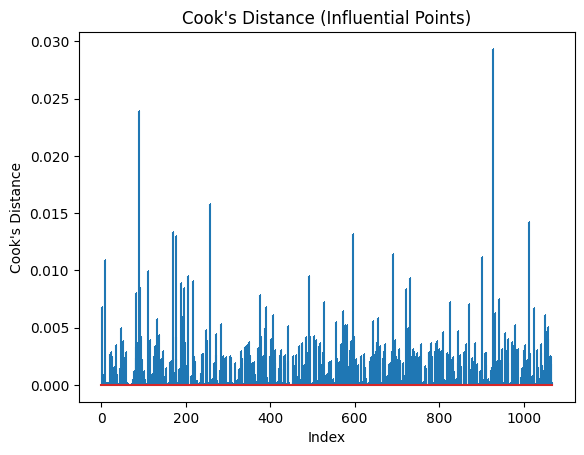

In [ ]:
# Self Learning
# Outliers & Influential Points (Cook’s Distance)

influence = model_sm.get_influence()
cooks, _ = influence.cooks_distance

plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.title("Cook's Distance (Influential Points)")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.show()


Polynomial Regression (BMI vs Charges, deg=2)
R2: 0.0409371174863038
RMSE: 13275.301143801904


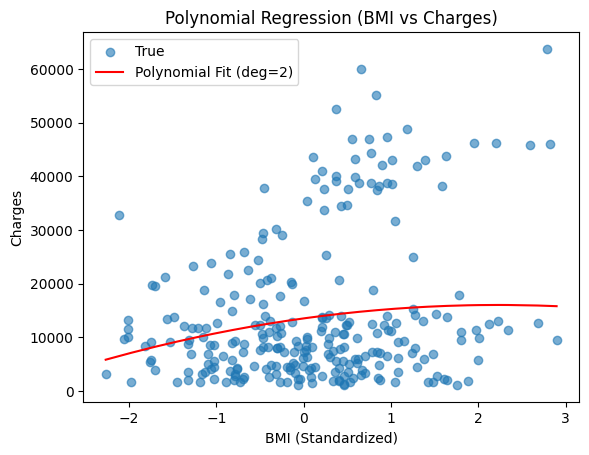

In [ ]:
# Polynomial Regression (BMI vs Charges, degree=2)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_bmi_poly = poly.fit_transform(X_bmi)
X_bmi_test_poly = poly.transform(X_bmi_test)

lr_poly = LinearRegression()
lr_poly.fit(X_bmi_poly, y_train)
y_poly_pred = lr_poly.predict(X_bmi_test_poly)

mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)

print("Polynomial Regression (BMI vs Charges, deg=2)")
print("R2:", r2_score(y_test, y_poly_pred))
print("RMSE:", rmse)

# Plot curve
sorted_idx = np.argsort(X_bmi_test.values.ravel())
X_sorted = X_bmi_test.values.ravel()[sorted_idx]
y_poly_sorted = y_poly_pred[sorted_idx]

plt.scatter(X_bmi_test, y_test, alpha=0.6, label="True")
plt.plot(X_sorted, y_poly_sorted, color="red", label="Polynomial Fit (deg=2)")
plt.xlabel("BMI (Standardized)")
plt.ylabel("Charges")
plt.legend()
plt.title("Polynomial Regression (BMI vs Charges)")
plt.show()


In [ ]:
# Self Learning
# Cross-Validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearRegression(), scaler.fit_transform(X), y, cv=kf, scoring="r2")
print("Cross-Validation R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())


Cross-Validation R2 scores: [0.80684663 0.71456334 0.75125418 0.67483847 0.74825753]
Mean CV R2: 0.7391520293888119


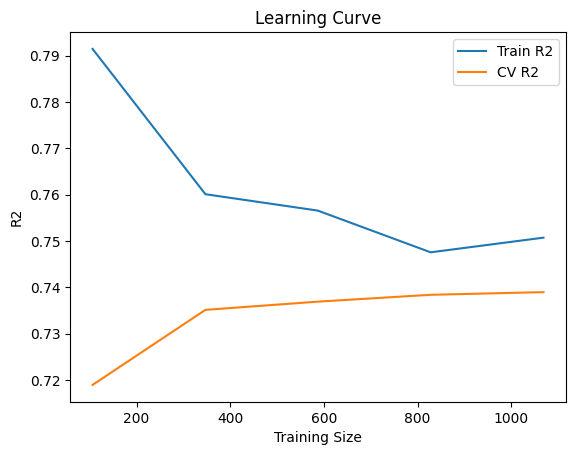

In [ ]:
# Self Learning
# Learning Curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), scaler.fit_transform(X), y, cv=kf,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring="r2"
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train R2")
plt.plot(train_sizes, test_scores.mean(axis=1), label="CV R2")
plt.xlabel("Training Size")
plt.ylabel("R2")
plt.title("Learning Curve")
plt.legend()
plt.show()


Random Forest Regression
R2: 0.881774985655591
RMSE: 4660.961629012958


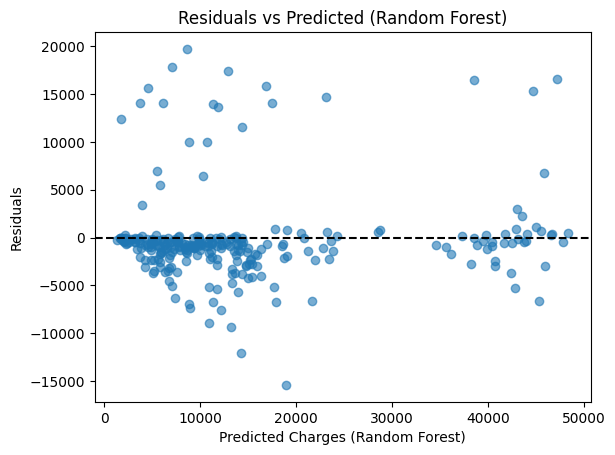

In [ ]:
# Self Learning
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_rf_pred = rf.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_rf_pred)
rmse = np.sqrt(mse)

print("Random Forest Regression")
print("R2:", r2_score(y_test, y_rf_pred))
print("RMSE:", rmse)

# Residuals plot
residuals_rf = y_test - y_rf_pred
plt.scatter(y_rf_pred, residuals_rf, alpha=0.6)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Predicted Charges (Random Forest)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Random Forest)")
plt.show()


/tmp/ipython-input-1669097243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X_train_scaled.columns[indices], palette="viridis")


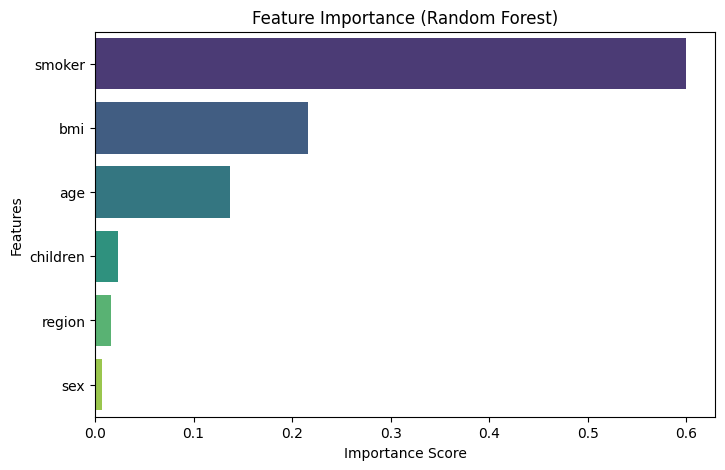

In [ ]:
# Feature Importance

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=X_train_scaled.columns[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
